In [1]:
library(lattice)
library(MASS)
require(pscl) # alternatively can use package ZIM for zero-inflated models
library(lmtest)
library(marginaleffects)
library(ggcorrplot)
library(performance)
library(see)
library(topmodels)
library(statmod)
library(assessor)

library(dplyr)

Loading required package: pscl

Classes and Methods for R originally developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University (2002-2015),
by and under the direction of Simon Jackman.
hurdle and zeroinfl functions by Achim Zeileis.

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: ggplot2


Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# loading in data structures

In [2]:
make_preds <- function(data, zinb, nb, pm, zip){
    preds = data.frame( rep_id = data$rep_id, 
                    CRE_id = data$CRE_id, 
                    cell_type = data$cell_type_annotation,
                    observed_umis_MPRA_BC = data$UMIs_MPRA_BC,
                    zinb=predict(zinb, new_data=data), 
                    nb = predict(nb, new_data=data),
                    pm = predict(pm, new_data=data)
                    ,zip = predict(zip, new_data=data)
                    )
}

In [3]:
shendure_ungrouped <- read.csv("/home/eng26/project/scmpra/data/GSE217686_assigned_oBC_CRE_mBC_joined_counts_sc_rep_mEB_series.txt", sep='\t', header = T)
#colnames(shendure_ungrouped) <- c('cellBC','rep_id','CRE_class','CRE_id','transfection_BC','MPRA_BC','reads_transfection_BC','UMIs_transfection_BC','reads_MPRA_BC','UMIs_MPRA_BC')
shendure_ungrouped

cellBC,rep_id,oBC,mBC,CRE_class,CRE_id,reads_oBC,UMIs_oBC,reads_mBC,UMIs_mBC
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
A1_GTTACCCAGTTGAAGT-1,A1,GAAAGTGTATTTGGGT,ACGTAACATTATAAT,devCRE,Txndc12_chr4_7978,499,415,0,0
A1_GTTACCCAGTTGAAGT-1,A1,CCGGGGTAGGCGAAGA,AACTCAGACTACCAC,devCRE,Col1a2_chr6_72,510,414,0,0
A1_GTTACCCAGTTGAAGT-1,A1,ACTGACGTCAATCAAT,TGTTTAAGTCAACAA,devCRE,Klf4_chr4_3952,850,678,0,0
A1_GTTACCCAGTTGAAGT-1,A1,GGAGGTGTGCGCGTGG,CAACAACACATTTTA,devCRE,Foxa2_chr2_13840,549,451,0,0
A1_GTTACCCAGTTGAAGT-1,A1,CGATACCTACTTAATA,TACCTAATGGGAAAG,promoters,minP,413,353,0,0
A1_GTTACCCAGTTGAAGT-1,A1,CCGGGGTTGTAGGTAA,AAATGGTAAAAGGCA,devCRE,Lamc1_chr1_12152,319,258,0,0
A1_GTTACCCAGTTGAAGT-1,A1,GATGGATTGAGCATAT,CTAATTTGGACCTTA,devCRE,Klf4_chr4_3949,334,256,0,0
A1_GTTACCCAGTTGAAGT-1,A1,AAATCCAGGTTTCCTT,CCCACTCGCACAACG,promoters,pgk1P,682,578,0,0
A1_GTTACCCAGTTGAAGT-1,A1,ACGCGAATATTCAGAA,CCCCATATAGCTTCG,devCRE,Txndc12_chr4_7951,448,365,0,0


In [4]:
shendure <- read.csv("shendure_counts_grouped.txt", sep='\t', header = T)
colnames(shendure) <- c('cellBC','rep_id','CRE_class','CRE_id','cell_type_annotation','transfection_BC','MPRA_BC','reads_transfection_BC','UMIs_transfection_BC','reads_MPRA_BC','UMIs_MPRA_BC')
shendure

cellBC,rep_id,CRE_class,CRE_id,cell_type_annotation,transfection_BC,MPRA_BC,reads_transfection_BC,UMIs_transfection_BC,reads_MPRA_BC,UMIs_MPRA_BC
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
2B1_AAACCCACAAGGTTGG-1,2B1,devCRE,Btg1_chr10_9572,Neuroectoderm (brain),CATCGCTGAGTAAACG,GCGTACTCACCAGGT,73,67,0,0
2B1_AAACCCACAAGGTTGG-1,2B1,devCRE,Gata4_chr14_5710,Neuroectoderm (brain),GAGGATGAGTTGGAAT,CAATCGCACCCCCGA,167,159,0,0
2B1_AAACCCACAAGGTTGG-1,2B1,devCRE,Klf4_chr4_3952,Neuroectoderm (brain),CGTGAATTAATTCTAT,AACCCGGTAAATGTA,99,89,0,0
2B1_AAACCCACAAGGTTGG-1,2B1,devCRE,Lama1_chr17_7793,Neuroectoderm (brain),AGTAAGTCAGCTCTTT,CGTGACCTCTTCATT,159,147,0,0
2B1_AAACCCACAAGGTTGG-1,2B1,devCRE,Sox17_chr1_67,Neuroectoderm (brain),GACAATAAAATTCCAT,ACAGTCACAAATTTA,59,58,0,0
2B1_AAACCCACAAGGTTGG-1,2B1,devCRE,Sox17_chr1_82,Neuroectoderm (brain),CTTTATTTGGCCCAGT,ACCTAATACAAACTG,12,12,0,0
2B1_AAACCCACAAGGTTGG-1,2B1,devCRE,Sparc_chr11_7203,Neuroectoderm (brain),AGTGGAGGCGACAGAG,TGCTTACCTGTAATT,130,120,0,0
2B1_AAACCCACAAGGTTGG-1,2B1,devCRE,Sparc_chr11_7235,Neuroectoderm (brain),GCATGATTCTGTGAAC,CAGTGTGATACACAC,32,28,114,4
2B1_AAACCCACAAGGTTGG-1,2B1,promoters,minP,Neuroectoderm (brain),GTTTCCTACTAAACTCAACTAACTGACGCAGC,CGGTGAGGAACCTTACATTACACCGCCAAA,230,222,0,0


In [5]:
shendure_grouped <- shendure %>% group_by(cell_type_annotation, CRE_id) %>%
summarise(total_UMIs_MPRA_BC = sum(UMIs_MPRA_BC),
total_reads_MPRA_BC = sum(reads_MPRA_BC),
)

`summarise()` has grouped output by 'cell_type_annotation'. You can override
using the `.groups` argument.


In [6]:
shendure_zinb = readRDS("R_model_files/shendure_znb_rep_id_CRE_id_rep_id.RDS")
shendure_zip = readRDS("R_model_files/shendure_zip_rep_id_CRE_id_rep_id.RDS")
shendure_nb = readRDS("R_model_files/shendure_negbin_rep_id_CRE_id.RDS")
shendure_pm = readRDS("R_model_files/shendure_poisson_rep_id_CRE_id.RDS")

In [7]:
compare_performance(shendure_pm, shendure_nb, shendure_zip, shendure_zinb, rank=T, metrics="all")

Following indices with missing values are not used for ranking: R2,
  R2_adjusted, R2_Nagelkerke



Name,Model,RMSE,Sigma,Score_log,Score_spherical,R2,R2_adjusted,R2_Nagelkerke,AIC_wt,AICc_wt,BIC_wt,Performance_Score
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
shendure_pm,glm,42.66164,1.00000,-Inf,0.001025918,NA,NA,1.0000000,0.000000000,0.000000000,0.00000e+00,-Inf
shendure_nb,negbin,49.65456,1.00000,-Inf,0.001029712,NA,NA,0.9083281,0.997529114,0.997537863,1.00000e+00,-Inf
shendure_zip,zeroinfl,47.13020,47.13722,-Inf,0.001045348,0.9697754,0.9697666,NA,0.000000000,0.000000000,0.00000e+00,-Inf
shendure_zinb,zeroinfl,49.65454,49.66198,-Inf,0.001029712,0.9979999,0.9979994,NA,0.002470886,0.002462137,2.12002e-18,-Inf


In [8]:
shendure_preds <- make_preds(shendure, shendure_zinb, shendure_nb, shendure_pm, shendure_zip)

# Inspecting model params

In [9]:
summary(shendure_zinb)


Call:
zeroinfl(formula = formula, data = data, dist = "negbin")

Pearson residuals:
     Min       1Q   Median       3Q      Max 
 -0.4871  -0.3144  -0.1992  -0.1234 600.5558 

Count model coefficients (negbin with log link):
                                               Estimate Std. Error  z value
(Intercept)                                   -4.026801   0.135045  -29.818
cell_type_annotationEpiblast/primitive streak  0.606967   0.033932   17.888
cell_type_annotationEx. Endoderm (parietal)    1.065953   0.033993   31.358
cell_type_annotationEx. Endoderm (visceral)   -0.022997   0.035234   -0.653
cell_type_annotationHaematoendothelial         0.056107   0.039347    1.426
cell_type_annotationMesoderm                  -0.506597   0.033603  -15.076
cell_type_annotationNeuroectoderm (brain)     -0.453123   0.033438  -13.551
cell_type_annotationNeuroectoderm (rostral)   -0.467869   0.039365  -11.885
cell_type_annotationPluripotent                0.887790   0.032711   27.140
cell_type_ann

In [10]:
head(shendure_zinb$model)

,UMIs_mBC,cell_type_annotation,rep_id,CRE_id
,<int>,<chr>,<chr>,<chr>
1,0,Neuroectoderm (brain),2B1,Btg1_chr10_9572
2,0,Neuroectoderm (brain),2B1,Gata4_chr14_5710
3,0,Neuroectoderm (brain),2B1,Klf4_chr4_3952
4,0,Neuroectoderm (brain),2B1,Lama1_chr17_7793
5,0,Neuroectoderm (brain),2B1,Sox17_chr1_67
6,0,Neuroectoderm (brain),2B1,Sox17_chr1_82


In [11]:
ls(shendure_zinb)

[1] "call"          "coefficients"  "contrasts"     "control"      
 [5] "converged"     "df.null"       "df.residual"   "dist"         
 [9] "fitted.values" "formula"       "levels"        "link"         
[13] "linkinv"       "loglik"        "method"        "model"        
[17] "n"             "offset"        "optim"         "residuals"    
[21] "SE.logtheta"   "start"         "terms"         "theta"        
[25] "vcov"          "weights"       "y"

In [12]:
#### we want this, poisson rate params

head(shendure_zinb$fitted.values)

1           2           3           4           5           6 
0.006904296 0.006891013 0.018518517 0.103874467 0.049138416 0.043414322

In [13]:
length(shendure_zinb$fitted.values)

[1] 778248

# following the paper

In [17]:
head(shendure)

,cellBC,rep_id,CRE_class,CRE_id,cell_type_annotation,transfection_BC,MPRA_BC,reads_transfection_BC,UMIs_transfection_BC,reads_MPRA_BC,UMIs_MPRA_BC
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,2B1_AAACCCACAAGGTTGG-1,2B1,devCRE,Btg1_chr10_9572,Neuroectoderm (brain),CATCGCTGAGTAAACG,GCGTACTCACCAGGT,73,67,0,0
2,2B1_AAACCCACAAGGTTGG-1,2B1,devCRE,Gata4_chr14_5710,Neuroectoderm (brain),GAGGATGAGTTGGAAT,CAATCGCACCCCCGA,167,159,0,0
3,2B1_AAACCCACAAGGTTGG-1,2B1,devCRE,Klf4_chr4_3952,Neuroectoderm (brain),CGTGAATTAATTCTAT,AACCCGGTAAATGTA,99,89,0,0
4,2B1_AAACCCACAAGGTTGG-1,2B1,devCRE,Lama1_chr17_7793,Neuroectoderm (brain),AGTAAGTCAGCTCTTT,CGTGACCTCTTCATT,159,147,0,0
5,2B1_AAACCCACAAGGTTGG-1,2B1,devCRE,Sox17_chr1_67,Neuroectoderm (brain),GACAATAAAATTCCAT,ACAGTCACAAATTTA,59,58,0,0
6,2B1_AAACCCACAAGGTTGG-1,2B1,devCRE,Sox17_chr1_82,Neuroectoderm (brain),CTTTATTTGGCCCAGT,ACCTAATACAAACTG,12,12,0,0


In [16]:
unique(shendure['rep_id'])

,rep_id
,<chr>
1,2B1
147095,2B2
341875,A1
431051,A2
531473,B1
654058,B2


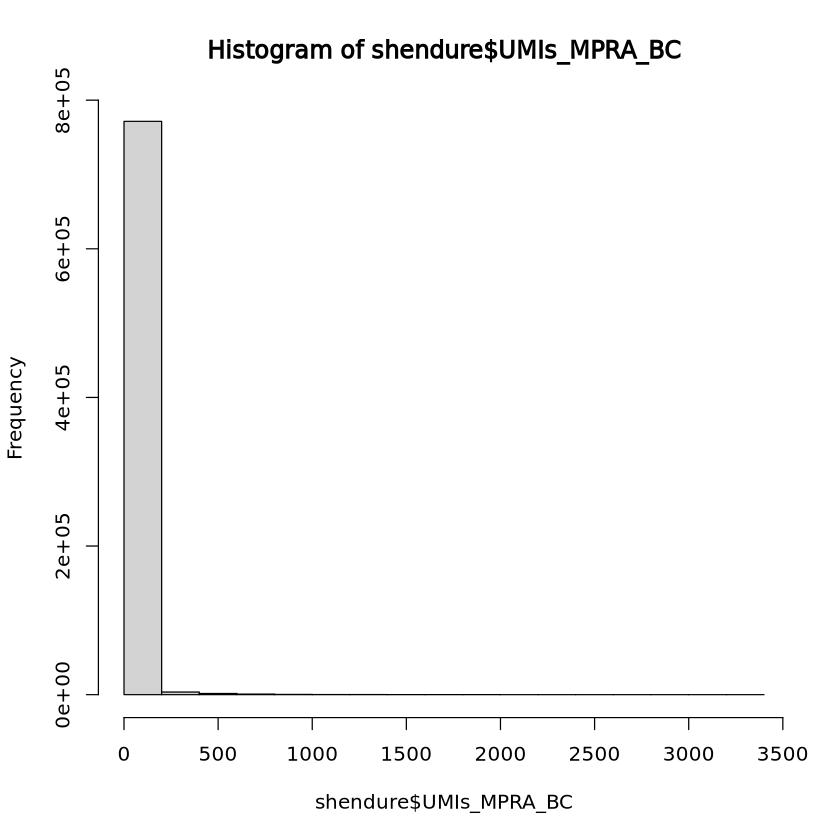

In [18]:
hist(shendure$UMIs_MPRA_BC)

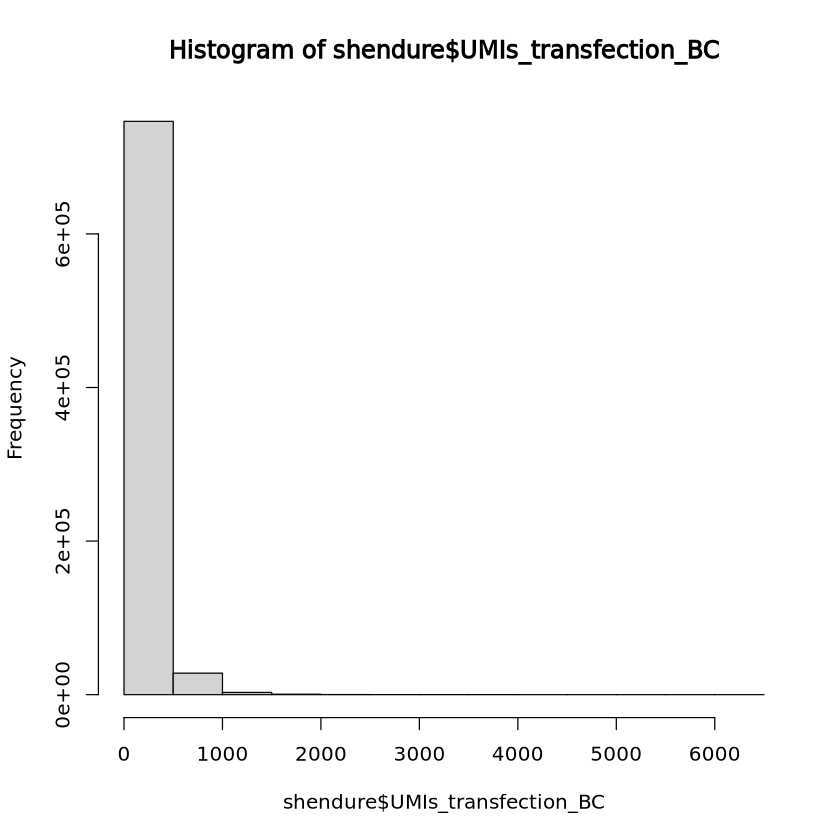

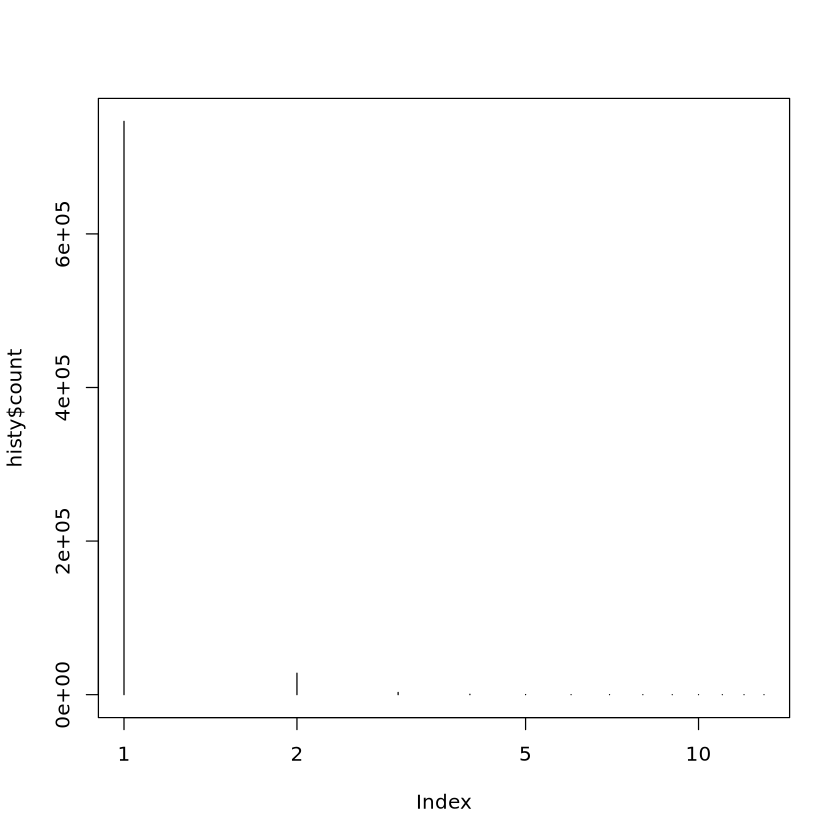

In [30]:
histy <- hist(shendure$UMIs_transfection_BC)
plot(histy$count, log='x', type='h')

In [38]:
summary(shendure_ungrouped$UMIs_oBC)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   11.0    55.0   107.0   146.1   190.0  4616.0 

In [43]:
cell_cre_groupby <- shendure %>% group_by(cellBC, CRE_id) %>% 
                            summarise(total_transfection_BC_UMIs = sum(UMIs_transfection_BC),
                                      total_MPRA_BC_UMIs = sum(UMIs_MPRA_BC),
                                      total_reads_transfection = sum(reads_transfection_BC),
                                      total_reads_MPRA = sum(reads_MPRA_BC),
                                      cell_type = cell_type_annotation  
                                        )

`summarise()` has grouped output by 'cellBC'. You can override using the
`.groups` argument.


In [47]:
cell_cre_groupby$CRE_id

[1] "Btg1_chr10_9572"    "Gata4_chr14_5710"   "Klf4_chr4_3952"    
    [4] "Lama1_chr17_7793"   "Sox17_chr1_67"      "Sox17_chr1_82"     
    [7] "Sparc_chr11_7203"   "Sparc_chr11_7235"   "minP"              
   [10] "Bend5_chr4_8170"    "Bend5_chr4_8199"    "Bend5_chr4_8201"   
   [13] "Btg1_chr10_9572"    "Btg1_chr10_9588"    "Btg1_chr10_9613"   
   [16] "Cited2_chr10_1246"  "Col5a1_chr2_2558"   "Col5a1_chr2_2565"  
   [19] "Col5a1_chr2_2576"   "Epas1_chr17_10056"  "Epas1_chr17_10066" 
   [22] "Epas1_chr17_10071"  "Foxa2_chr2_13808"   "Foxa2_chr2_13841"  
   [25] "Foxa2_chr2_13861"   "Gata4_chr14_5749"   "Gata4_chr14_5752"  
   [28] "Gata4_chr14_5762"   "Gata4_chr14_5763"   "Gata4_chr14_5776"  
   [31] "Igfbp4_chr11_16740" "Igfbp4_chr11_16743" "Klf4_chr4_3946"    
   [34] "Klf4_chr4_3951"     "Klf4_chr4_3952"     "Lama1_chr17_7814"  
   [37] "Lamb1_chr12_2183"   "Lamb1_chr12_2216"   "Lamb1_chr12_2239"  
   [40] "Lamc1_chr1_12152"   "Lamc1_chr1_12183"   "Map1b_chr13_9429"  
   [43] "Map1b_chr13_9447"   "Sox17_chr1_69"      "Sox2_chr3_2009"    
   [46] "Sox4_chr13_2054"    "Sox4_chr13_2057"    "Sparc_chr11_7199"  
   [49] "Sparc_chr11_7213"   "Sparc_chr11_7233"   "Sparc_chr11_7243"  
   [52] "Tgfbi_chr13_5705"   "Tubb2b_chr13_2577"  "Tubb2b_chr13_2580" 
   [55] "Tubb2b_chr13_2590"  "Txndc12_chr4_7951"  "Txndc12_chr4_7975" 
   [58] "Txndc12_chr4_7978"  "eef1aP"             "minP"              
   [61] "noP"                "pgk1P"              "ubcP"              
   [64] "Bend5_chr4_8174"    "Cited2_chr10_1267"  "Col1a1_chr11_15307"
   [67] "Epas1_chr17_10066"  "Foxa2_chr2_13861"   "Gata4_chr14_5742"  
   [70] "Gata4_chr14_5749"   "Igfbp4_chr11_16738" "Klf4_chr4_3946"    
   [73] "Lama1_chr17_7784"   "Lama1_chr17_7787"   "Lamb1_chr12_2183"  
   [76] "Lamb1_chr12_2289"   "Lamc1_chr1_12185"   "Map1b_chr13_9436"  
   [79] "Sox17_chr1_77"      "Sox17_chr1_83"      "Sox4_chr13_2057"   
   [82] "Tubb2b_chr13_2557"  "Tubb2b_chr13_2568"  "Tubb2b_chr13_2580" 
   [85] "minP"               "noP"                "ubcP"              
   [88] "Bend5_chr4_8174"    "Epas1_chr17_10061"  "Gata4_chr14_5749"  
   [91] "Lamb1_chr12_2288"   "Map1b_chr13_9429"   "Tubb2b_chr13_2583" 
   [94] "Bend5_chr4_8174"    "Cdk5r1_chr11_12575" "Cited2_chr10_1267" 
   [97] "Col1a1_chr11_15276" "Col1a2_chr6_73"     "Col1a2_chr6_88"    
  [100] "Col5a1_chr2_2562"   "Col5a1_chr2_2565"   "Col5a1_chr2_2576"  
  [103] "Epas1_chr17_10056"  "Epas1_chr17_10066"  "Epas1_chr17_10116" 
  [106] "Foxa2_chr2_13835"   "Foxa2_chr2_13861"   "Gata4_chr14_5710"  
  [109] "Gata4_chr14_5729"   "Gata4_chr14_5749"   "Gata4_chr14_5762"  
  [112] "Igfbp4_chr11_16743" "Igfbp4_chr11_16784" "Lama1_chr17_7793"  
  [115] "Lamc1_chr1_12152"   "Lamc1_chr1_12193"   "Sox17_chr1_59"     
  [118] "Sox17_chr1_60"      "Sox2_chr3_2007"     "Sox4_chr13_2055"   
  [121] "Sox4_chr13_2057"    "Sparc_chr11_7195"   "Tgfbi_chr13_5741"  
  [124] "Tubb2b_chr13_2557"  "Tubb2b_chr13_2576"  "Txndc12_chr4_7978" 
  [127] "minP"               "pgk1P"              "Bend5_chr4_8174"   
  [130] "Bend5_chr4_8201"    "Btg1_chr10_9593"    "Cdk5r1_chr11_12562"
  [133] "Cdk5r1_chr11_12575" "Cdk5r1_chr11_12595" "Cited2_chr10_1267" 
  [136] "Col1a1_chr11_15270" "Col1a1_chr11_15301" "Col1a1_chr11_15307"
  [139] "Col1a2_chr6_72"     "Col1a2_chr6_88"     "Epas1_chr17_10061" 
  [142] "Foxa2_chr2_13818"   "Foxa2_chr2_13840"   "Foxa2_chr2_13841"  
  [145] "Gata4_chr14_5693"   "Gata4_chr14_5742"   "Gata4_chr14_5752"  
  [148] "Lamc1_chr1_12175"   "Lamc1_chr1_12185"   "Lamc1_chr1_12193"  
  [151] "Sox17_chr1_60"      "Sox4_chr13_2057"    "Tgfbi_chr13_5724"  
  [154] "Tgfbi_chr13_5735"   "Txndc12_chr4_7962"  "Txndc12_chr4_7978" 
  [157] "eef1aP"             "noP"                "Bend5_chr4_8172"   
  [160] "Cdk5r1_chr11_12559" "Col1a1_chr11_15307" "Col5a1_chr2_2575"  
  [163] "Col5a1_chr2_2576"   "Klf4_chr4_3934"     "Lamc1_chr1_12127"  
  [166] "Sox2_chr3_2007"     "Sparc_chr11_7182"   "Txndc12_chr4_7951" 
  [169] "eef1aP"            

In [48]:
length(unique(cell_cre_groupby$CRE_id))

[1] 212

In [79]:
cre_groupby <- shendure %>% group_by(CRE_id) %>% 
                            summarise(total_transfection_BC_UMIs = sum(UMIs_transfection_BC),
                                      total_MPRA_BC_UMIs = sum(UMIs_MPRA_BC),
                                      total_reads_transfection = sum(reads_transfection_BC),
                                      total_reads_MPRA = sum(reads_MPRA_BC),
                                      num_cell_types = n(),  
                                      num_cellBCs = n())

In [80]:
cre_groupby

CRE_id,total_transfection_BC_UMIs,total_MPRA_BC_UMIs,total_reads_transfection,total_reads_MPRA,num_cell_types,num_cellBCs
<chr>,<int>,<int>,<int>,<int>,<int>,<int>
Bend5_chr4_8168,492796,66,569311,1147,2940,2940
Bend5_chr4_8170,306426,118,354720,1934,2196,2196
Bend5_chr4_8172,329103,36,378111,631,2155,2155
Bend5_chr4_8174,962164,705,1100506,13668,5884,5884
Bend5_chr4_8175,643325,3959,740934,76365,4437,4437
Bend5_chr4_8179,378078,389,439739,7759,2188,2188
Bend5_chr4_8192,740901,53,852748,1084,4041,4041
Bend5_chr4_8199,905274,208,1038340,3944,5268,5268
Bend5_chr4_8201,1008465,1957,1162433,36500,6035,6035
